# Telecome Users Data Exploration

## Preliminary Wrangling
This document explores a dataset containing  attributes for approximately 7043 Telecome users.



In [1]:
#Importing needable packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#Reading the data file and having a fast view , i noticed that null values hee need to be identified in reading line code...
tel_users=pd.read_csv("Telecom-Customer-Retention.csv",na_values=' ')
tel_users.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#convert MultipleLines, InternetService, Contract, and  PaymentMethod into ordered categorical types
ordinal_var_dict = {'MultipleLines': ['No phone service', 'No', 'Yes'],
                    'InternetService': ['No', 'DSL', 'Fiber optic'],
                    'Contract':['Month-to-month', 'One year', 'Two year'],
                    'PaymentMethod':['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],
                   'OnlineSecurity':['No internet service','No','Yes'],
                    'OnlineBackup':['No internet service','No','Yes'],
                    'DeviceProtection':['No internet service','No','Yes'],
                    'TechSupport':['No internet service','No','Yes'],
                    'StreamingTV':['No internet service','No','Yes'],
                    'StreamingMovies':['No internet service','No','Yes']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    tel_users[var] = tel_users[var].astype(ordered_var)

In [4]:
#Fast View on data information....
tel_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null category
InternetService     7043 non-null category
OnlineSecurity      7043 non-null category
OnlineBackup        7043 non-null category
DeviceProtection    7043 non-null category
TechSupport         7043 non-null category
StreamingTV         7043 non-null category
StreamingMovies     7043 non-null category
Contract            7043 non-null category
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null category
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: cate

In [5]:
#Check Null values...
tel_users.isnull().sum()
#11 Null values in TotalCharges

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
#Since Monthly Charges are part of Total charges >>> i will consider total charges equals only monthly charges with no other charges
tel_users["TotalCharges"].fillna(tel_users["MonthlyCharges"],inplace=True)

In [7]:
#Turning Total Charges to float type
tel_users["TotalCharges"]=tel_users["TotalCharges"].astype(float)

In [8]:
#Check Duplicated....
tel_users.duplicated().sum()
# No Duplicated

0

In [9]:
# Data columns : 
tel_users.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# Senior Citizen is a categorial deature, for better use will change it to type object ("Yes" , " No")
tel_users["SeniorCitizen"]=tel_users["SeniorCitizen"].astype(str)

In [11]:
tel_users['SeniorCitizen']=tel_users['SeniorCitizen'].apply(lambda x:x.replace('0',"No"))
tel_users['SeniorCitizen']=tel_users['SeniorCitizen'].apply(lambda x:x.replace('1',"Yes"))
tel_users['SeniorCitizen'].unique()
#Done

array(['No', 'Yes'], dtype=object)

In [12]:
#View on numeri data descr. stats ..
tel_users.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [13]:
#Remoing unnecessary Columns as CustomerID
tel_users.drop(columns=['customerID'],inplace=True)

In [14]:
#Remoing phone service as mentioned again in multiple line
tel_users.drop(columns=['PhoneService'],inplace=True)

## What is the structure of your dataset?
There are 7043 Telecome user with 20 features :(gender','SeniorCitizen','Partner','Dependents','tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'), Most variables are categorical
(Yes or No), Only both Charges and Tenure are numeric in nature.

## What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting wheather the customer is going to remain a subscriber to the services or not (Attribute Churn).

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe the contract type, Subscription period (Tenure), Senior Citizen and Both Charges are most important features to invistigate.


# Univariate Exploration

Let's Start with our main variable of interest (Churn)


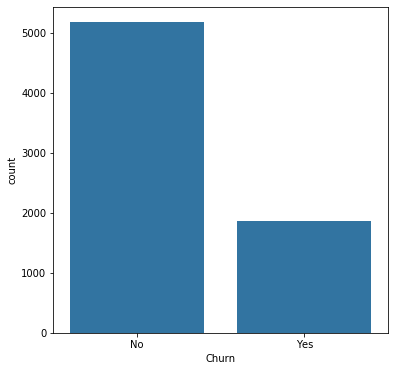

In [15]:
#Starting with plotting Churn categories counts.....
base_c=sb.color_palette()[0]
plt.figure(figsize=(6, 6))
sb.countplot(tel_users['Churn'],color=base_c)
plt.show()

In [16]:
print("Unsucscriber's Ratio : ",(tel_users[tel_users['Churn']=='Yes'].shape[0]*100)/tel_users['Churn'].shape[0] ,'%')

Unsucscriber's Ratio :  26.536987079369588 %


Most of the subscribers are going to renew the subscription ...... we need to look further why?.... Does having a monthly or yearly Contract affects that? ... we shall see

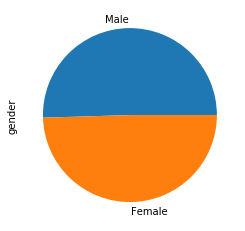

In [17]:
# fast look on gender...
tel_users['gender'].value_counts().plot(kind='pie');

Nealry Equal counts of gender

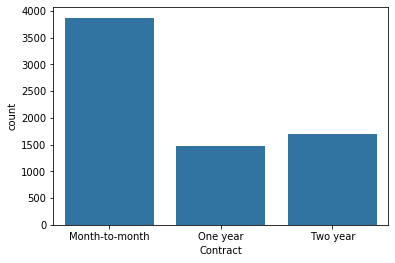

In [18]:
# fast look on Contrats...
sb.countplot(x=tel_users.Contract,color=base_c);

Most Contracts are Monthly

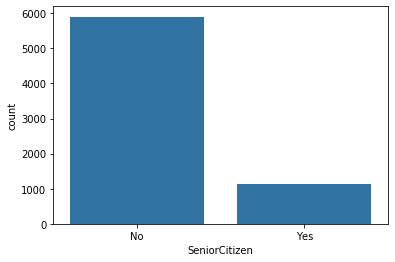

In [19]:
# View Senior citizen ...
sb.countplot(x=tel_users.SeniorCitizen,color=base_c);

Most Sbscribers don't have senior citizen...

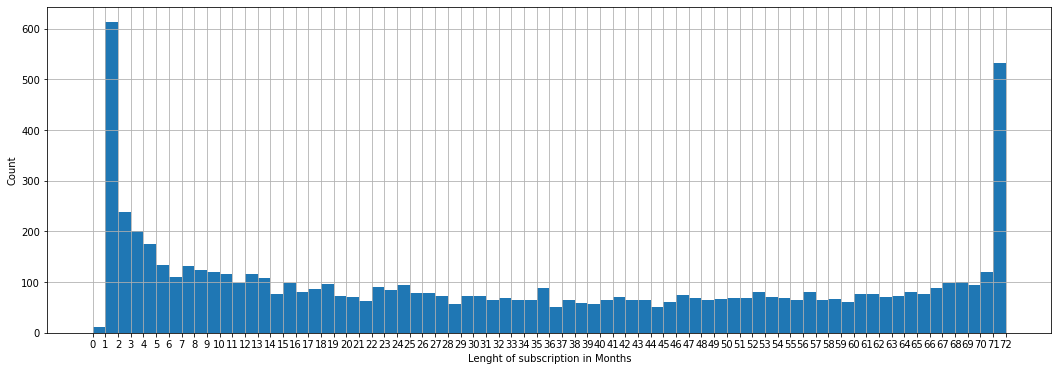

In [20]:
#Tenure Dist.
plt.figure(figsize=(18, 6))
bins_t=np.arange(0,tel_users['tenure'].max()+1,1)
ticks_t=np.arange
plt.xlabel("Lenght of subscription in Months")
plt.ylabel("Count")
plt.xticks(bins_t)
plt.hist(tel_users['tenure'],color=base_c,bins=bins_t,rwidth=1)
plt.grid()
plt.show()

Most Users are new, the second most are old users who exceeded about 70 Months (Loyal ones), The Range between them is making a shape of a crest, falling until 36-45 then slighly increasing till 71 then goes abnormally high again, the lowest numbers are among who are in thier 44-45 months period of cont. subscription.

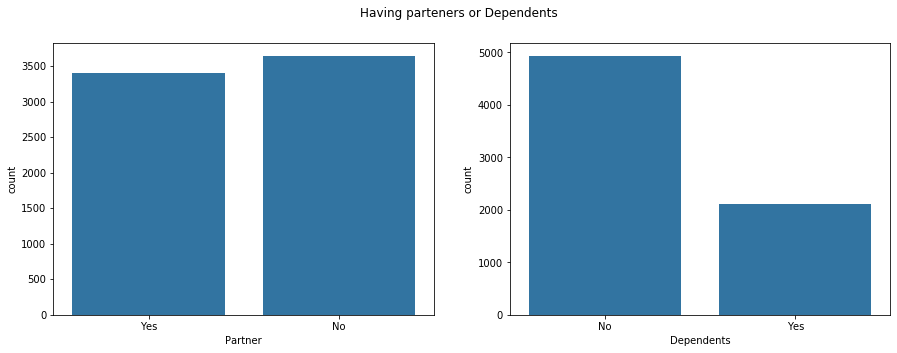

In [21]:
#Fast look on having partner or dependents

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
fig.suptitle('Having parteners or Dependents')
sb.countplot(x=tel_users.Partner,color=base_c,ax=ax1);
sb.countplot(x=tel_users.Dependents,color=base_c,ax=ax2);


Having a partner or not is nearly equal data, but most subscribers don't have dependants.

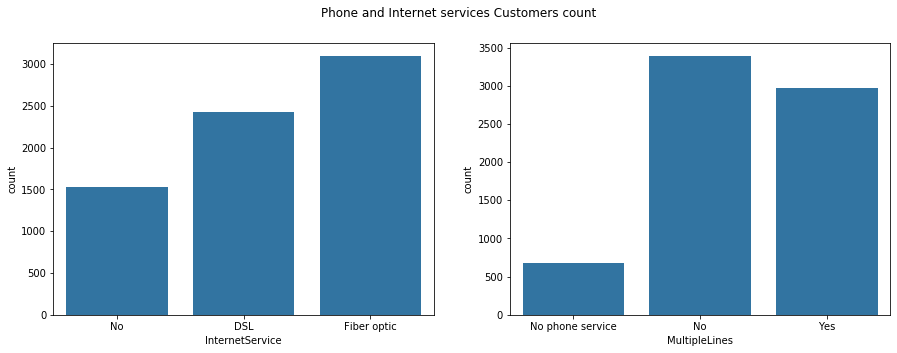

In [22]:
#A look over types of phone service customers...
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
fig.suptitle('Phone and Internet services Customers count')
sb.countplot(x=tel_users.InternetService,color=base_c,ax=ax1);
sb.countplot(x=tel_users.MultipleLines,color=base_c,ax=ax2);

Most people has phone lines, The Majority with a single line but customers with multiple lines have a great portion too, Most of them are Internet service subscribers and divided between DSL and Fiber with most internet subscribers.

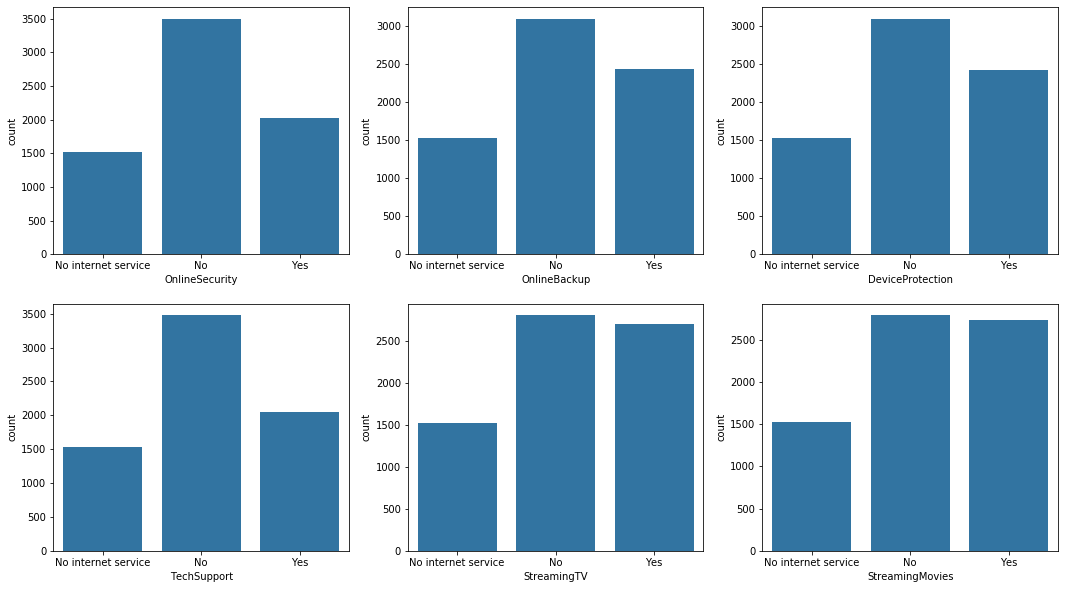

In [23]:
#A view over the extra servies subscribers
fig, ax = plt.subplots(nrows=2,ncols=3 ,figsize = [18,10])
sb.countplot(x = tel_users.OnlineSecurity, color = base_c, ax = ax[0,0])
sb.countplot(x = tel_users.OnlineBackup, color = base_c, ax = ax[0,1])
sb.countplot(x = tel_users.DeviceProtection, color = base_c, ax = ax[0,2])
sb.countplot(x = tel_users.TechSupport, color = base_c, ax = ax[1,0])
sb.countplot(x = tel_users.StreamingTV, color = base_c, ax = ax[1,1])
sb.countplot(x = tel_users.StreamingMovies, color = base_c, ax = ax[1,2])
plt.show()


Among subscribers of internet service most of them don't have additional service, but among who have additional ones the most popular is Tv and Movies streaming followed by online backup and device protection, and the least popular is the Technical support  and online security.

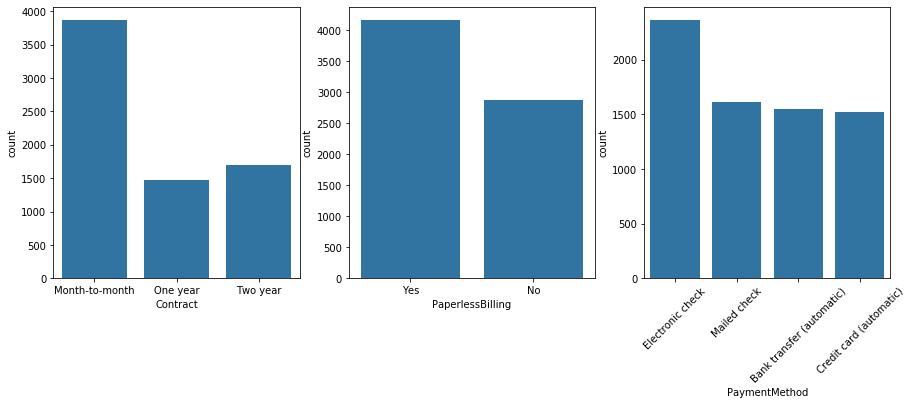

In [24]:
#A look on the last categorical attributes Contrat, Paperless Billing, Payment Method.
fig, ax = plt.subplots(ncols=3 ,figsize = [15,5])
sb.countplot(x = tel_users.Contract, color = base_c, ax = ax[0])
sb.countplot(x = tel_users.PaperlessBilling, color = base_c, ax = ax[1])
sb.countplot(x = tel_users.PaymentMethod, color = base_c, ax = ax[2])
plt.xticks(rotation=45)
plt.show()

Most Subscribers have a Monthly Contract followed by 2 years then 1 year ontract is the least popular one, Also most Subscribers have no billing papers, And Electronic check is the most popular way of paying followed by Mailed check, Bank transfer and the paying by a Credit Card is the least popular paying method.

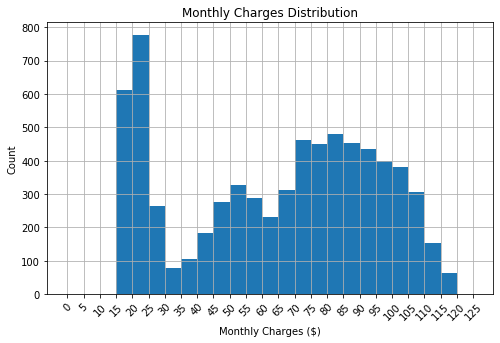

In [25]:
# Let's view the numeric cont. values remaining both Charges, let's begin with the Monthly one....

plt.figure(figsize=(8,5))
bins_mc=np.arange(0,tel_users.MonthlyCharges.max()+10,5)
plt.hist(x=tel_users.MonthlyCharges,color=base_c,bins=bins_mc)
plt.xticks(bins_mc,rotation=45)
plt.grid()
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Count")
plt.title('Monthly Charges Distribution')
plt.show()


The Dist. is nearly like a bimodel one, Many have between 15-25 USD charge, the curve goes down at it's lowest at 30-35 then turn up again until reahes the second model peak at 80-85 USD then downwards again, The proper explanation is charges maybe depends on the amount of services the customer is subscribing, The more services the more Charges.

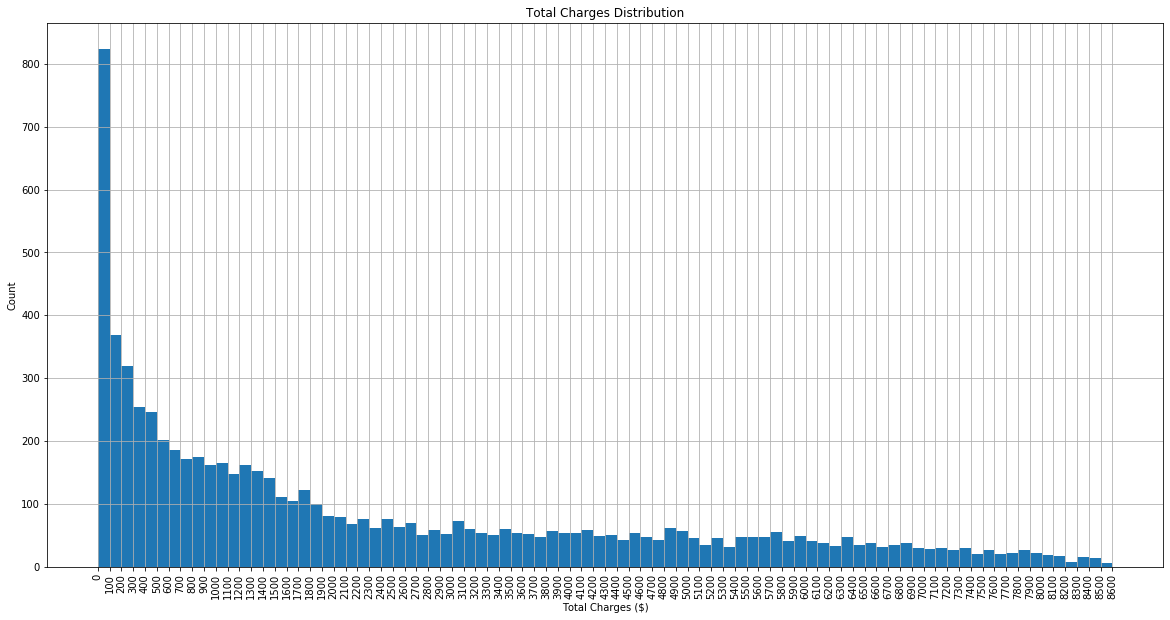

In [26]:
#Now let's view the  last numeric cont. values remaining "Total Charges"

plt.figure(figsize=(20,10))
bins_tc=np.arange(0,tel_users.TotalCharges.max()+10,100)
plt.hist(x=tel_users.TotalCharges,color=base_c,bins=bins_tc)
plt.xticks(bins_tc,rotation=90)
plt.grid()
plt.xlabel("Total Charges ($)")
plt.ylabel("Count")
plt.title('Total Charges Distribution')
plt.show()


We got a very right skewed curve where most subsribers Totla charges exist, along the tail where the charges is increasing the proper explanation is these subsribers have the longest subscription period, The longer the period the more charges paid.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? 

The Monthly Charges distr. is some how a bimodel one with 2 peaks at 20-25 and 80-85, The Total Charges are very left skewed with a long range of values among the tail.

# Bivariate Exploration


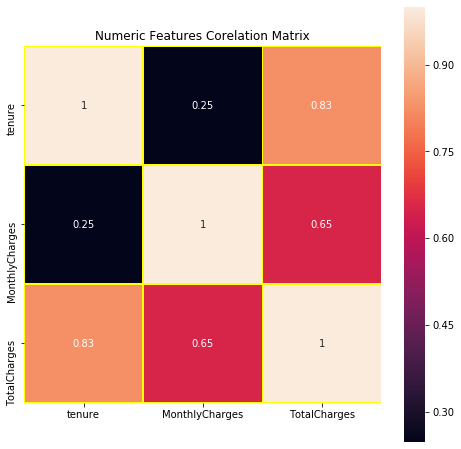

In [27]:
#Start with the Correlation Plot
plt.figure(figsize=(8,8))
ax=sb.heatmap(tel_users.corr(),annot=True,linewidths=0.5,annot_kws={"size": 10},linecolor="yellow",square=True);
bottom , top = ax.get_ylim()
ax.set_ylim(bottom +0.5,top -0.5)
plt.title("Numeric Features Corelation Matrix")
plt.show()

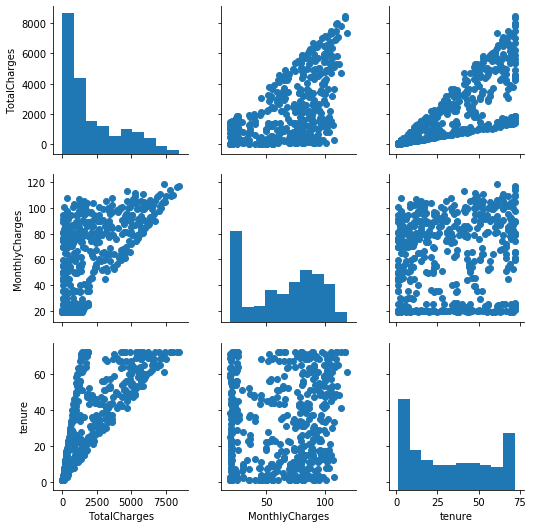

In [28]:

samples = np.random.choice(tel_users.shape[0], 500, replace = False)
tel_samples = tel_users.loc[samples,:]
g = sb.PairGrid(data = tel_samples,vars=['TotalCharges','MonthlyCharges','tenure'])
g = g.map_diag(plt.hist);
g.map_offdiag(plt.scatter)
plt.show()

Without no surprise a correlation accurs between Monthly and Total Charges, Also as mentioned before a very strong correlation between Tenure and Total Charges as the longer the sub. period the more charges paid.

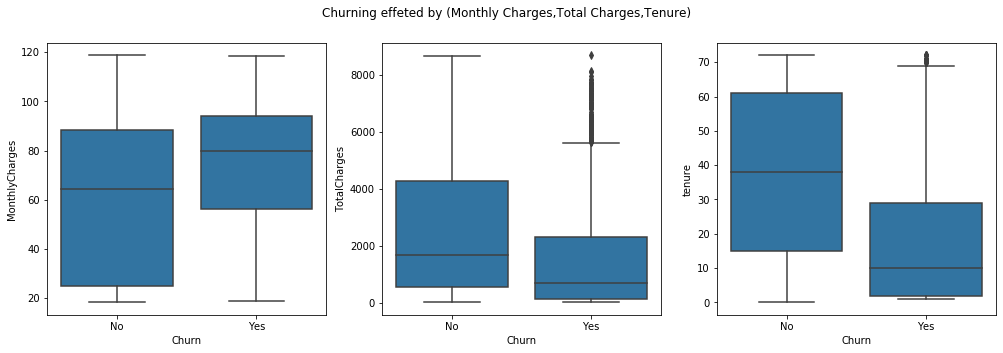

In [29]:
# Let's see what effect of these numeric vars on our feature of interest
fig, ax =plt.subplots(ncols=3,figsize=(17,5))
plt.suptitle('Churning effeted by (Monthly Charges,Total Charges,Tenure)')
sb.boxplot(x=tel_users.Churn,y=tel_users.MonthlyCharges,ax = ax[0],color=base_c)
sb.boxplot(x=tel_users.Churn,y=tel_users.TotalCharges,ax = ax[1],color=base_c)
sb.boxplot(x=tel_users.Churn,y=tel_users.tenure,ax = ax[2],color=base_c)
plt.show()

As we see, The more the Monthly charges increases the percentage of leaving increases as shown, The Total Charges of unsubscribers is less and that's normal and shown from the Tenure plot most of them are new subscribers and didn't continue their subscription.

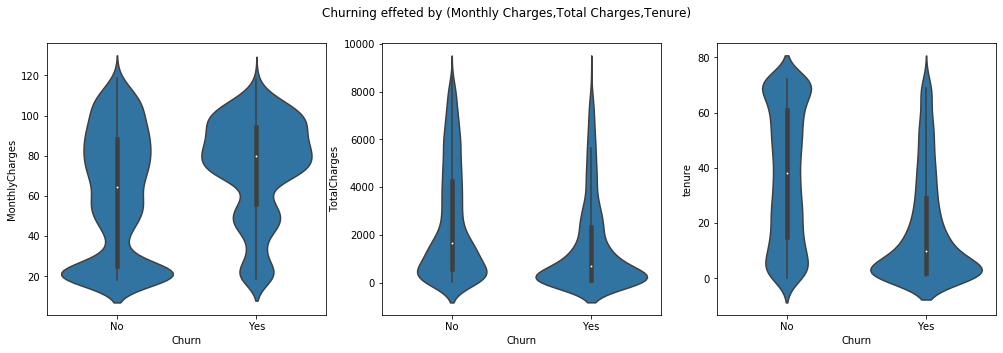

In [30]:
fig, ax =plt.subplots(ncols=3,figsize=(17,5))
plt.suptitle('Churning effeted by (Monthly Charges,Total Charges,Tenure)')
sb.violinplot(x=tel_users.Churn,y=tel_users.MonthlyCharges,ax = ax[0],color=base_c)
sb.violinplot(x=tel_users.Churn,y=tel_users.TotalCharges,ax = ax[1],color=base_c)
sb.violinplot(x=tel_users.Churn,y=tel_users.tenure,ax = ax[2],color=base_c)
plt.show()

From the violin plots, The conclusions from the box before accures, So as the Tenre increase the probability of churning decrease, Also as the Monbthly Charges increase the Churning increase.

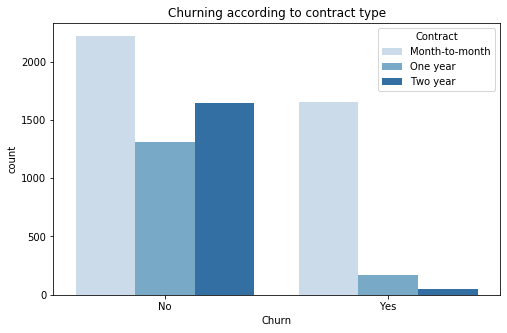

In [31]:
#What about the Contract type mentined before....
plt.figure(figsize=(8,5))
plt.title("Churning according to contract type")
sb.countplot(x=tel_users.Churn,hue=tel_users.Contract,palette='Blues')
plt.show()

Interestingly most churning customers have month to month Contracts, Who contracted for a year or two are very more likely to remain, I would also say having a long-term contract makes it more difficult to leave.

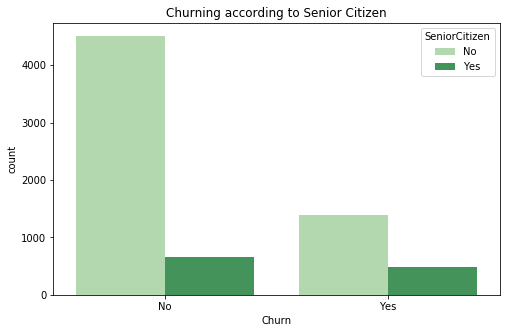

In [32]:
#Finally we view the relation with senior itizin....
plt.figure(figsize=(8,5))
plt.title("Churning according to Senior Citizen")
sb.countplot(x=tel_users.Churn,hue=tel_users.SeniorCitizen,palette='Greens')
plt.show()

Well, If a customer is a Senior Citizen there's a greater probability of leaving, As shown a very big amount of who deosn't remains as a customer.

## Talking about some of the relationships i observed in this part of the investigation 
There is a strong correlation between Total Charges and period of subsc. and that's normal, A decent correlation between Monthly and Total charges and that's not a surprise, Moving to see relations between variables and Churn we focused only on (Contract, Monthly Charges, Totally Charges, SeniorCitizen and Tenure) and fond a relation between them and our feature of interest (Churn),
As the longer the contract the more likely the customer going to remain, The less Monthly Charges the more likely to remain,Also Senior Citizen affects the Churning as not havint it makes it more likely the customer is going to stay,Also the more period the customer been loyal to the company the more likely he stays and also the more Total Charges he paid the more likely he remains and that's also connected to his period of subscr.

# Multivariate Exploration
The main thing in this part is exploring of the analysis as how the seleted features affects the Churn when they interact each other. 



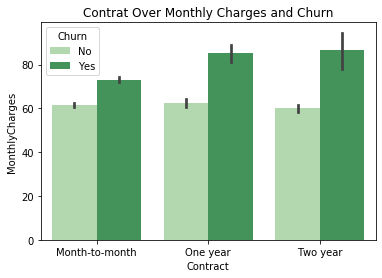

In [33]:
sb.barplot(x=tel_users.Contract,y=tel_users.MonthlyCharges,hue=tel_users.Churn,palette='Greens')
plt.title('Contrat Over Monthly Charges and Churn')
plt.show()

Here we observe that the more the contract period the more charges would be but we noticed something about the Churning, Also the highest paying Contracts among the customers tend to leave, This makes it more obvious that charges are vital for customer's decision, but i observed that most if nearly all staying customers whose charges are under an average of 60 USD are eager to stay..... Interesting.

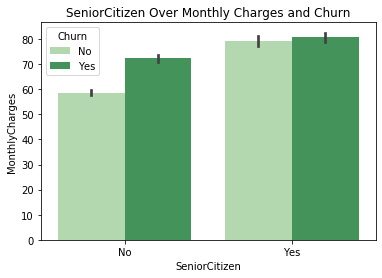

In [34]:
sb.barplot(x=tel_users.SeniorCitizen,y=tel_users.MonthlyCharges,hue=tel_users.Churn,palette='Greens');
plt.title('SeniorCitizen Over Monthly Charges and Churn')
plt.show()

This one shows us that even Charges has a great influence on Customer's decision, Senior Citizen who pays much doesn't affect much, Only we could say the customer with no Senior citizen and pays high charges starts from 60 USD is more likely to unsubscribe than who pay less.

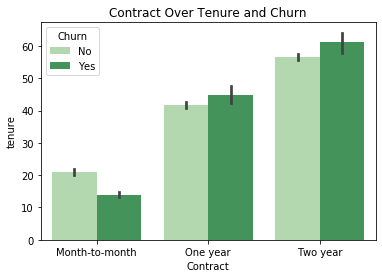

In [35]:
sb.barplot(x=tel_users.Contract,y=tel_users.tenure,hue=tel_users.Churn,palette='Greens');
plt.title('Contract Over Tenure and Churn')
plt.show()

We observed before tenure has a relation with Churn, Here we make another insight, Even customer's who has been subscribed for a long period are more eager to stay, The longest period subscribers tends to leave among 1,2 year contracts and the exact opposite amonge those with Monthly contracts, This is interesting as when we looked deeper we now know we need to be very catious about the subscription period, More than 40 Months in 1 year contract tends to leave, More than 55 Months in 2 year contract tends also to leave, The aVerage of staying customers with monthly contracts is about 20 Month but the unsubscribers are with aerage 15 Month Period.

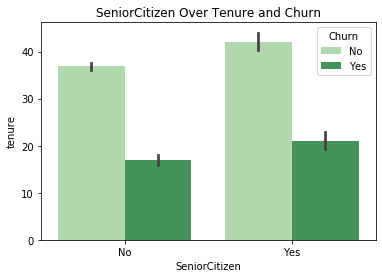

In [36]:
sb.barplot(x=tel_users.SeniorCitizen,y=tel_users.tenure,hue=tel_users.Churn,palette='Greens');
plt.title('SeniorCitizen Over Tenure and Churn')
plt.show()

This plot hasn't a significant insight, It tell us as observed the more Tenure period the more the customer likely to stay, The observation here is nearly the same percentage of staying customers to leaving wheather the customer is with Senior citizenship or not but it also tells us customers with senior Citizenship have a bit larger average of tenure.

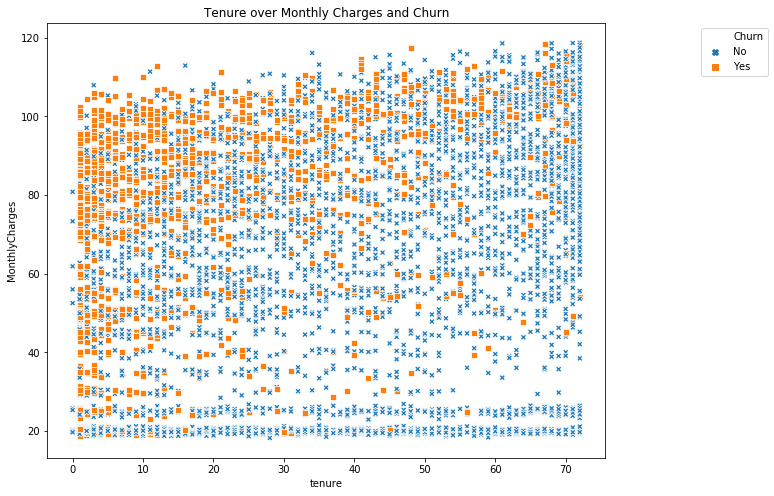

In [37]:
#Let's see the Tenure , Monthly Charges all with Churn relation ....
plt.figure(figsize=(10,8))
markers = {"Yes": "s", "No": "X"}
sb.scatterplot(x=tel_users.tenure,y=tel_users.MonthlyCharges,hue=tel_users.Churn,style=tel_users.Churn,markers=markers)
plt.legend(loc='upper right', bbox_to_anchor=(1+.3,1))
plt.title('Tenure over Monthly Charges and Churn')
plt.show()

As we said before, Even the plot looks confusing but if we determined where the leavers most concenterate it looks mostly at the upper left side of the plot where the tenure is low and Charges are high, Mostly if the tenure increases the probability of staying increases, The leavers at the upper right side describe what we noticed as at the highest subsribing period of customers leaving is a high option too against the common trend of tenure,Churn relation.

## Talking about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of my selected features but ignored Total Charges this time as Tenure is a better choice to progress in this invistigation, The Multivariate here approved the relation between the Monthly Charges and the Churn decision and that as the charges decrease the more likely the customer is going to stay, Most staying Customers pays under 60 USD Monthly, More than that they tend to leave, Also i found even staying for a long period makes customer more likely to stay, The unsubscribed customers have a small tenure or the highest tenure  among old subscribers who aren't going to renew their contracts and i descovered that thanks to the multivariate plots, The SeniorCitizen attribute isn't much about it, we could say the Monthly charges among those with it doesn't make a significant effect on the Churn, But amng who doesn't have Senior Cistizenship the known Tenure effect applies on Churn.